In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=["Name", "Ticket"], inplace=True)

# Quick Exploratory Data Analysis (Quick EDA)

In [5]:
from jcopml.plot import plot_missing_value

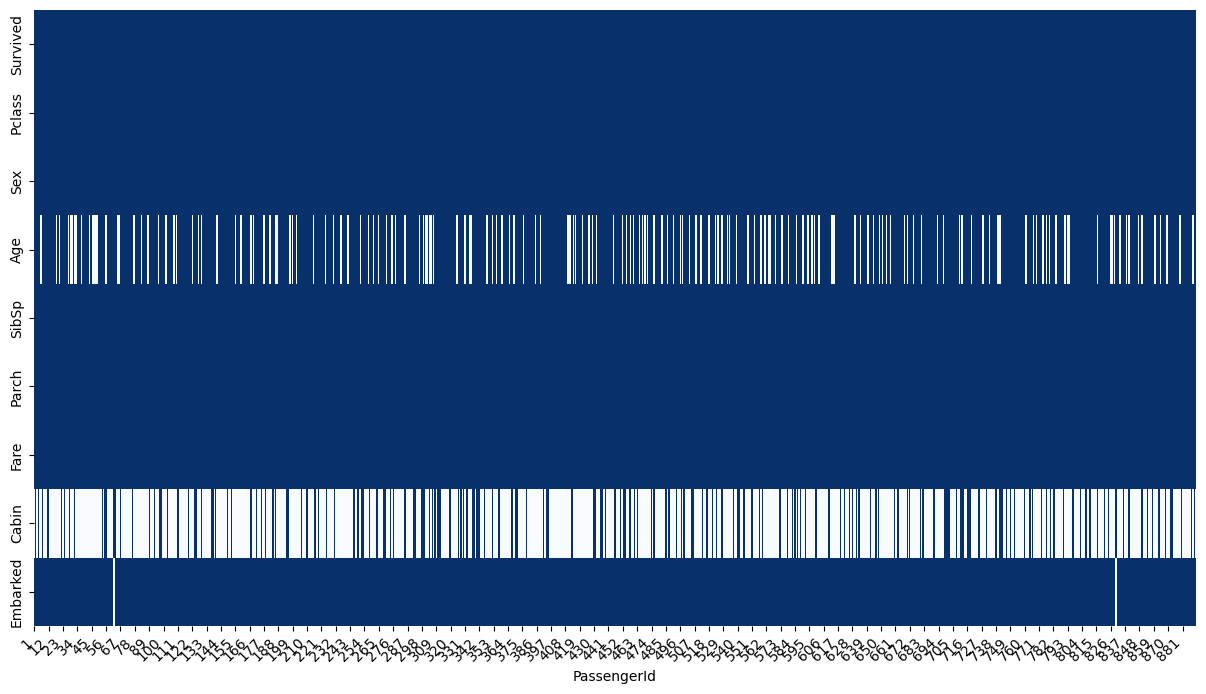

In [6]:
plot_missing_value(df)

In [7]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [8]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.fillna({"Embarked": "S"}, inplace=True)

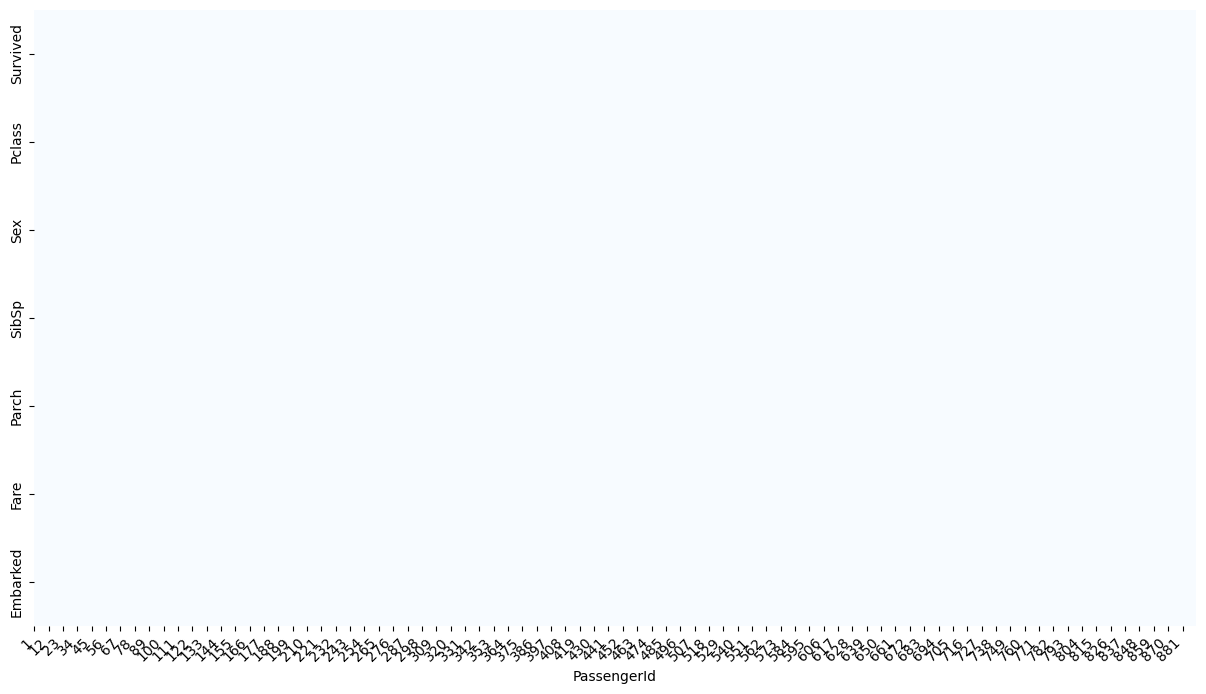

In [10]:
plot_missing_value(df)

# Persiapan Data

In [11]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [ ]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])

In [ ]:
X

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

In [ ]:
knn.score(X, y)

# Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns="Survived")
y = df.Survived

X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

#  K-fold Cross Validation

In [ ]:
illustration.kfold_cv

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5)

In [ ]:
cross_val_score(knn, X, y, cv=5).mean()

# Improvement melalui data: Feature Scaling

In [ ]:
demo.knn_scaling()

In [ ]:
illustration.knn_scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

In [ ]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

# Improvement melalu model: Parameter Tuning

### Tuning n_neighbor tanpa scaling

In [ ]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor dengan scaling

In [ ]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

### Tuning n_neighbor dengan weight by distance

In [ ]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}") 

### pakai Manhattan Distance

In [ ]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", p=1)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))
    
plt.plot(neighbor, train_score, label='train')
plt.plot(neighbor, test_score, label='test')
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}") 